In [26]:
# Binary classification, 2 classes , 11/2/2022
# in this notebook we intend to make a model for binary classification to compare results 

import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import os
import numpy as np
import pandas as pd           # ... eliminatio
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

###  the class code:
class 0 = df_mirai_leg
class 1 = df_bashlite_leg
class 2 = df_torii_leg
class 3 = df_mirai_CC
class 4 = df_mirai_spread 
class 5 = df_bashlite_CC 
class 6 = df_bashlite_spread 
class 7 = df_torii_mal 
for this model 
class 0 = Normal
class 1 = mal

### Read my labeled dataset MedBIoT

### The filename of the dataset (df_MedBIoT_all_2Class) in new CSV (df_MedBIoT_all_2Class.csv)

In [27]:

df_MedBIoT_all_2Class= pd.read_csv('df_MedBIoT_all_2Class.csv', header=0)  #from model2-to_make2Classes


In [28]:
df_MedBIoT_all_2Class   # 

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,Class
0,8.119090,85.262577,2.154520e+02,12.715432,85.430106,2.410619e+02,22.098051,84.712734,2.581714e+02,84.938541,...,0.000000e+00,0.000000e+00,40.981053,81.511474,3.444528e+01,5.869011,81.511474,0.000000e+00,0.000000e+00,0
1,11.929964,516.358444,7.704967e+02,14.033933,516.208241,7.824682e+02,17.496759,516.010545,7.965394e+02,20.063248,...,0.000000e+00,0.000000e+00,62.517881,515.349777,8.389090e+02,28.963926,515.349777,0.000000e+00,0.000000e+00,0
2,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.076384,...,1.270458e+00,1.293847e+00,4.871709,67.205295,9.589746e-01,2.525067,95.077122,-9.089941e-02,-3.988214e-02,0
3,6.132969,60.074786,5.926919e-01,10.054135,60.147825,1.160747e+00,25.528954,60.672014,4.926224e+00,128.740564,...,7.070510e-29,6.347533e-17,409.786387,60.000000,9.094947e-12,0.000003,84.852814,-3.328025e-27,-6.680758e-16,0
4,14.313002,69.235529,2.355523e+02,18.612767,68.970597,2.116271e+02,26.481134,68.730793,1.878978e+02,46.471145,...,-4.330960e+01,-1.086798e-02,2.999976,82.333416,5.028919e+02,188.983417,150.230012,-9.898591e+00,-2.352295e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004818,1.000000,60.000000,9.094947e-13,1.000021,60.000000,9.094947e-13,1.028289,60.000000,0.000000e+00,3.324344,...,1.176888e+00,1.674490e-01,29.275000,61.466348,6.771123e+01,12.520485,86.941095,1.404413e+01,1.808608e-01,1
1004819,1.000000,60.000000,0.000000e+00,1.000017,60.000000,4.547474e-13,1.026472,60.000000,0.000000e+00,3.304983,...,4.612322e-01,1.005622e-01,29.365618,61.540022,4.536901e+01,9.237331,86.909030,9.295905e+00,2.183249e-01,1
1004820,1.000000,60.000000,0.000000e+00,1.000021,60.000000,0.000000e+00,1.028369,60.000000,8.640200e-12,3.340821,...,5.255564e-01,3.791539e-02,29.331388,61.528509,4.504743e+01,9.450701,87.002784,6.382070e+00,1.429157e-01,1
1004821,1.000000,60.000000,4.547474e-13,1.000021,60.000000,0.000000e+00,1.028157,60.000000,4.547474e-13,3.314738,...,2.076003e-01,6.331249e-02,29.192432,61.348654,5.156178e+01,10.596623,86.755628,7.230178e+00,1.292098e-01,1


In [29]:
df_MedBIoT_all_2Class.shape 


(1004823, 101)

In [30]:
X=df_MedBIoT_all_2Class

In [31]:
# shuffle rows of dataframe 
sampler=np.random.permutation(len(X))
data=X.take(sampler)
data

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,Class
790389,30.578849,70.000000,3.637979e-12,30.745887,70.000000,2.728484e-12,30.914817,70.000000,9.094947e-13,32.196436,...,4.347609e-15,7.928621e-09,178.317578,68.760731,2.182074e+00,1.477184,95.310221,-3.673281e-15,-1.505424e-09,1
600475,750.552393,1474.000000,6.519258e-09,1221.700496,1474.000000,3.725290e-09,3547.747376,1473.999998,2.057858e-03,28547.015093,...,-2.620481e+00,-8.097213e-02,50575.201685,1473.816016,1.810937e+02,14.178388,1475.332138,-5.215319e+00,-8.680464e-02,1
950327,1.539039,70.802074,2.181795e+02,1.727797,72.345429,2.302987e+02,2.786139,69.822889,2.080204e+02,21.664748,...,3.434844e+01,3.009660e-01,212.639467,61.606128,4.711830e+01,10.517818,87.549065,1.043934e+01,1.908404e-01,1
487207,1.956102,60.163209,1.279035e+00,2.871247,60.577016,4.283263e+00,7.284447,61.698758,1.339986e+01,81.974141,...,-3.349117e-34,-3.682393e-22,379.634496,60.000000,4.547474e-13,0.000002,84.852814,1.537260e-27,1.380071e-15,0
503233,177.365999,89.731780,1.872341e+04,188.243388,90.166702,1.857071e+04,203.228468,90.332745,1.812287e+04,220.058790,...,-2.458424e+03,-3.552067e-01,146.986288,68.190204,3.145247e+02,254.486632,1467.816021,-1.944890e+03,-4.319762e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490918,1.891764,61.799442,1.115754e+01,2.610600,62.769331,1.448545e+01,7.198117,64.481967,1.576856e+01,68.632166,...,5.500912e-29,3.825291e-17,366.804378,60.000000,2.273737e-12,0.000003,84.852814,-1.118102e-28,-2.666870e-17,0
167090,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.076265,...,-3.612770e-01,-9.932278e-01,4.871455,67.205267,9.578656e-01,2.311454,95.186122,-3.796443e-02,-1.852431e-02,0
263714,30.346344,60.177302,1.567825e+00,50.102832,60.216142,2.931234e+00,146.132386,60.549753,9.285412e+00,1245.741143,...,1.832519e-27,2.970772e-16,11381.908913,60.000000,2.637535e-11,0.000005,95.268043,-4.757842e-26,-4.857143e-15,0
757568,198.619568,75.148235,9.241109e+02,273.696153,75.091386,9.491959e+02,394.898755,75.441136,1.045533e+03,486.148149,...,-1.247402e+04,-9.448453e-01,11.999697,79.499588,1.799373e+03,306.190271,1444.462586,-1.244942e+04,-9.678439e-01,1


In [32]:
#the steps to dummy encode labels, this store separately
labels_full=pd.get_dummies(data['Class'], prefix='Class')
labels_full.head()

,Class_0,Class_1
790389,0,1
600475,0,1
950327,0,1
487207,1,0
503233,0,1


In [33]:
#to drop labels from training dataset
data=data.drop(columns='Class')
data.head()

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_magnitude_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1
790389,30.578849,70.000000,3.637979e-12,30.745887,70.000000,2.728484e-12,30.914817,70.000000,9.094947e-13,32.196436,...,96.167260,4.347609e-15,7.928621e-09,178.317578,68.760731,2.182074e+00,1.477184,95.310221,-3.673281e-15,-1.505424e-09
600475,750.552393,1474.000000,6.519258e-09,1221.700496,1474.000000,3.725290e-09,3547.747376,1473.999998,2.057858e-03,28547.015093,...,1475.411736,-2.620481e+00,-8.097213e-02,50575.201685,1473.816016,1.810937e+02,14.178388,1475.332138,-5.215319e+00,-8.680464e-02
950327,1.539039,70.802074,2.181795e+02,1.727797,72.345429,2.302987e+02,2.786139,69.822889,2.080204e+02,21.664748,...,92.241069,3.434844e+01,3.009660e-01,212.639467,61.606128,4.711830e+01,10.517818,87.549065,1.043934e+01,1.908404e-01
487207,1.956102,60.163209,1.279035e+00,2.871247,60.577016,4.283263e+00,7.284447,61.698758,1.339986e+01,81.974141,...,84.852814,-3.349117e-34,-3.682393e-22,379.634496,60.000000,4.547474e-13,0.000002,84.852814,1.537260e-27,1.380071e-15
503233,177.365999,89.731780,1.872341e+04,188.243388,90.166702,1.857071e+04,203.228468,90.332745,1.812287e+04,220.058790,...,1396.539300,-2.458424e+03,-3.552067e-01,146.986288,68.190204,3.145247e+02,254.486632,1467.816021,-1.944890e+03,-4.319762e-01


In [34]:
#to do standardize numerical columns
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=data.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_magnitude_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1
790389,-0.268482,-0.459942,-0.117606,-0.277432,-0.460596,-0.142996,-0.302610,-0.462634,-0.185956,-0.351950,...,-0.574438,0.085320,-0.000914,-0.269965,-0.462736,-0.125534,-0.509191,-0.577486,0.092954,-1.505424e-09
600475,1.139220,2.413592,-0.117606,1.256738,2.424603,-0.142996,1.949255,2.448772,-0.185956,4.771040,...,1.881745,0.085138,-0.001016,2.612587,2.378734,-0.124068,-0.423701,1.878916,0.092592,-8.680464e-02
950327,-0.325262,-0.458300,-0.116241,-0.314812,-0.455776,-0.141353,-0.320621,-0.463002,-0.184284,-0.353842,...,-0.581430,0.087714,-0.000536,-0.268002,-0.477205,-0.125166,-0.448340,-0.591301,0.093679,1.908404e-01
487207,-0.324446,-0.480074,-0.117598,-0.313339,-0.479960,-0.142966,-0.317740,-0.479848,-0.185848,-0.343006,...,-0.594587,0.085320,-0.000914,-0.258451,-0.480453,-0.125552,-0.519134,-0.596100,0.092954,1.380071e-15
503233,0.018518,-0.419557,-0.000415,-0.074546,-0.419154,-0.010463,-0.192275,-0.420471,-0.040317,-0.318198,...,1.741288,-0.086005,-0.001361,-0.271757,-0.463889,-0.122975,1.193795,1.865537,-0.042019,-4.319762e-01


In [35]:
#training data for the model
train_data_st=data_st.values
train_data_st

array([[-2.68482438e-01, -4.59941592e-01, -1.17606378e-01, ...,
        -5.77486180e-01,  9.29541683e-02, -1.50542377e-09],
       [ 1.13922048e+00,  2.41359161e+00, -1.17606378e-01, ...,
         1.87891556e+00,  9.25922311e-02, -8.68046413e-02],
       [-3.25261503e-01, -4.58300007e-01, -1.16240773e-01, ...,
        -5.91300827e-01,  9.36786467e-02,  1.90840352e-01],
       ...,
       [-2.68937036e-01, -4.80045473e-01, -1.17596565e-01, ...,
        -5.77561256e-01,  9.29541683e-02, -4.85714279e-15],
       [ 6.00732594e-02, -4.49404823e-01, -1.11822287e-01, ...,
         1.82396859e+00, -7.71021470e-01, -9.67843900e-01],
       [-3.20690693e-01, -4.77240553e-01, -1.17563244e-01, ...,
        -5.70579566e-01,  9.27918251e-02, -9.83959183e-02]])

In [36]:
#labels for training
labels=labels_full.values
labels

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [37]:
# The Validation Technique
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(703375, 100)
(200965, 100)
(100483, 100)


In [38]:
# new
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)


(703375, 100, 1)
(200965, 100, 1)
(100483, 100, 1)


In [39]:
import numpy as np
from tensorflow import keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import  Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D


In [40]:
# Build Cross CNN_LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding='same', input_shape = (train_data_st.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same'))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'cross_CNN_LSTM'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 100, 128)          768       
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 64)           41024     
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_3 (LSTM)               (None, 100, 16)           3136      
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)        

In [41]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']) #use binary loss

In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, lr=0.001)
                                           # lr=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

In [43]:
epochs = 50 #100
batch_size = 512


In [44]:
history = model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    #validation_split=0.10,
    callbacks=[learning_rate_reduction, checkpoint] 
)

Epoch 1/50
1373/1373 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.8731
Epoch 1: val_loss improved from inf to 0.18114, saving model to .\cross_CNN_LSTM.h5
1373/1373 [==============================] - 480s 347ms/step - loss: 0.2859 - accuracy: 0.8731 - val_loss: 0.1811 - val_accuracy: 0.9257 - lr: 0.0010
Epoch 2/50
1373/1373 [==============================] - ETA: 0s - loss: 0.1322 - accuracy: 0.9490
Epoch 2: val_loss improved from 0.18114 to 0.11498, saving model to .\cross_CNN_LSTM.h5
1373/1373 [==============================] - 503s 366ms/step - loss: 0.1322 - accuracy: 0.9490 - val_loss: 0.1150 - val_accuracy: 0.9573 - lr: 0.0010
Epoch 3/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9637
Epoch 3: val_loss improved from 0.11498 to 0.08317, saving model to .\cross_CNN_LSTM.h5
1373/1373 [==============================] - 500s 364ms/step - loss: 0.0963 - accuracy: 0.9637 - val_loss: 0.0832 - val_accuracy: 0.9671 - lr: 0.0

Epoch 26/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9864
Epoch 26: val_loss did not improve from 0.04379
1373/1373 [==============================] - 500s 364ms/step - loss: 0.0395 - accuracy: 0.9864 - val_loss: 0.0445 - val_accuracy: 0.9849 - lr: 1.2500e-04
Epoch 27/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9867
Epoch 27: val_loss improved from 0.04379 to 0.04031, saving model to .\cross_CNN_LSTM.h5
1373/1373 [==============================] - 505s 368ms/step - loss: 0.0384 - accuracy: 0.9867 - val_loss: 0.0403 - val_accuracy: 0.9870 - lr: 1.2500e-04
Epoch 28/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9868
Epoch 28: val_loss did not improve from 0.04031
1373/1373 [==============================] - 507s 369ms/step - loss: 0.0378 - accuracy: 0.9868 - val_loss: 0.0421 - val_accuracy: 0.9853 - lr: 1.2500e-04
Epoch 29/50
1373/1373 [==============================] -

<ipython-input-45-89a883549609>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-45-89a883549609>:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
<ipython-input-45-89a883549609>:23: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(

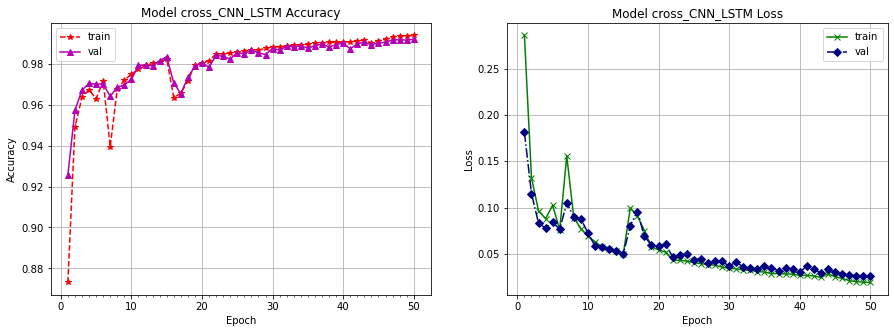

In [45]:
# plot the model's validation loss and validation accuracy
import pickle
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # to do summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'], '--*', color = (1,0,0))
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'], '-^', color = (0.7,0,0.7))
    axs[0].set_title('Model '+modelName+' Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid('on')
    # to do summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'],'-x', color = (0,0.5,0))
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'],  '-.D', color = (0,0,0.5))
    axs[1].set_title('Model '+modelName+' Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid('on')
    plt.savefig('./'+modelName+'.jpg',dpi=600, quality = 100, optimize = True)
    plt.show()

plot_model_history(history)
with open('./History_'+modelName, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

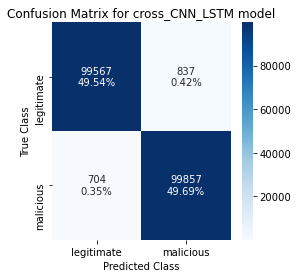

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
import seaborn as sns

y_pred = model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

label = ['legitimate','malicious']

plt.figure(figsize=(4,4))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for '+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [47]:
import random
import pickle
import datetime
from pprint import pprint
from sklearn.metrics import classification_report

# to print the report
print(classification_report(y_test_cm, y_pred_cm, target_names= ['legitimate','malicious'],  digits=4)) # 

loss, accuracy = model.evaluate(x_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['legitimate','malicious']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

              precision    recall  f1-score   support

  legitimate     0.9930    0.9917    0.9923    100404
   malicious     0.9917    0.9930    0.9923    100561

    accuracy                         0.9923    200965
   macro avg     0.9923    0.9923    0.9923    200965
weighted avg     0.9923    0.9923    0.9923    200965

6281/6281 [==============================] - 105s 17ms/step - loss: 0.0249 - accuracy: 0.9923
Test: accuracy = 0.992332  ;  loss = 0.024923
